In [214]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [215]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Original ranges based on your sample
tv_min, tv_max = 17, 230
radio_min, radio_max = 37, 46
news_min, news_max = 13, 70
units_min, units_max = 10, 23

companies = ['Amazon', 'Google', 'Facebook', 'Apple', 'Netflix', 'Tesla', 'Microsoft', 'Uber']

data = []
for i in range(600):
    company = np.random.choice(companies)
    tv = round(np.random.uniform(tv_min, tv_max), 1)
    radio = round(np.random.uniform(radio_min, radio_max), 1)
    news = round(np.random.uniform(news_min, news_max), 1)
    units = round(0.05*tv + 0.3*radio + 0.2*news + np.random.normal(0, 1), 1)  # correlated units
    data.append([company, tv, radio, news, units])

df = pd.DataFrame(data, columns=['Company', 'TV', 'Radio', 'News', 'Units'])

df.head()


,Company,TV,Radio,News,Units
0,Microsoft,186.7,38.7,57.4,31.2
1,Microsoft,29.4,44.8,47.3,26.5
2,Uber,155.6,37.5,54.2,29.9
3,Microsoft,46.7,39.6,33.9,20.6
4,Tesla,36.3,42.6,34.8,21.5


In [216]:
df.info

<bound method DataFrame.info of        Company     TV  Radio  News  Units
0    Microsoft  186.7   38.7  57.4   31.2
1    Microsoft   29.4   44.8  47.3   26.5
2         Uber  155.6   37.5  54.2   29.9
3    Microsoft   46.7   39.6  33.9   20.6
4        Tesla   36.3   42.6  34.8   21.5
..         ...    ...    ...   ...    ...
595     Google  143.4   37.7  48.5   26.7
596     Google   20.0   44.5  54.7   26.7
597   Facebook  128.1   45.8  56.2   30.4
598    Netflix  198.9   44.0  30.7   29.0
599     Amazon   51.7   42.1  57.0   25.1

[600 rows x 5 columns]>

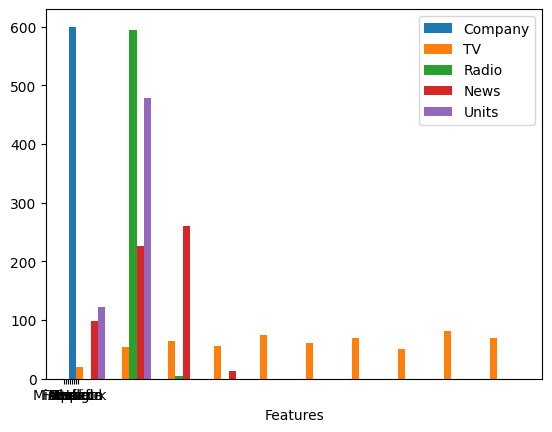

In [217]:
plt.hist(df , label=df.columns)
plt.xlabel('Features')
plt.legend()
plt.show()

In [218]:
f = ['TV' , 'Radio' , 'News']
featuresDf = df[f].copy()
targetDf = df.Units

featuresDf.head()

,TV,Radio,News
0,186.7,38.7,57.4
1,29.4,44.8,47.3
2,155.6,37.5,54.2
3,46.7,39.6,33.9
4,36.3,42.6,34.8


In [219]:
def normalize(features):
    
    for feature in features.T:
        fmean = np.mean(feature)
        
        frange= np.max(feature) - np.min(feature)
        
        feature -= fmean
        if frange != 0:
            feature /= frange
        
    return features

In [220]:
def predict(featuresMatrix, weight , bias):
    
    predictions = np.dot(featuresMatrix , weight) + bias
    
    return predictions

In [221]:
def cost_function(featuresMatrix , target , weights , bias):
    
    N = len(target)
    
    predictions = predict(featuresMatrix , weights, bias)
    
    sq_error = (target - predictions) ** 2
    return 1.0/(2*N) * np.sum(sq_error)
    

In [222]:
def update_weights(featuresMatrix , target , weights , bias , learning_rate):
    
    prediction = predict(featuresMatrix , weights , bias)
    
    X1 = featuresMatrix[: , 0] #TV
    X2 = featuresMatrix[: , 1] #Radio
    X3 = featuresMatrix[: , 2] #News
    
    N = len(target)
    d_w1 = -X1.dot(target - prediction) / N
    d_w2 = -X2.dot(target - prediction) / N
    d_w3 = -X3.dot(target - prediction) / N
    
    d_bias = -(target - prediction).mean()

    
    weights[0][0] -= (learning_rate * d_w1)
    weights[1][0] -= (learning_rate * d_w2)
    weights[2][0] -= (learning_rate * d_w3)
    
    bias -= (learning_rate * d_bias)
    
    return weights , bias

In [223]:
def train(featuresMatrix , target , weights , bias , learning_rate , iters):
    
    cost_history = []
    
    for i in range(iters):
        
        weights , bias = update_weights(featuresMatrix , target , weights , bias , learning_rate)
        
        cost = cost_function(featuresMatrix, target , weights , bias)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration : {i} , weight1 : {weights[0][0]} , weight2 : {weights[1][0]} , weight3 : {weights[2][0]} , bias : {bias} , cost : {cost}")
            
            print("\n")
        
    return weights , bias , cost_history

In [224]:
iters = 501
learning_rate = 0.08
bias = 0

w1 = 0.0
w2 = 0.0
w3 = 0.0

weights = np.array([
    [w1],
    [w2],
    [w3]
])

featuresMatrix = normalize(featuresDf.values)


target = targetDf.values.reshape(-1, 1)



weights , bias , cost_history = train(featuresMatrix , target , weights , bias , learning_rate , iters)

Iteration : 0 , weight1 : 0.07619820547201343 , weight2 : 0.022575082469136518 , weight3 : 0.08076478408779152 , bias : 2.1730933333333335 , cost : 323.73234613086885


Iteration : 100 , weight1 : 5.485632226297289 , weight2 : 1.5446706683516467 , weight3 : 5.819422658508632 , bias : 27.157688624770845 , cost : 3.0846614171880002


Iteration : 200 , weight1 : 8.11561125419242 , weight2 : 2.192602901862025 , weight3 : 8.61798137446919 , bias : 27.163665236648058 , cost : 1.1136859044073435


Iteration : 300 , weight1 : 9.394166311923877 , weight2 : 2.4593739321909536 , weight3 : 9.985239484339509 , bias : 27.16366666632459 , cost : 0.6491885223240569


Iteration : 400 , weight1 : 10.015633240078632 , weight2 : 2.5637457346854595 , weight3 : 10.654581779683648 , bias : 27.163666666666586 , cost : 0.5394065257139261


Iteration : 500 , weight1 : 10.317633130553748 , weight2 : 2.601164845078201 , weight3 : 10.982996655416539 , bias : 27.163666666666646 , cost : 0.5133718426948021




/var/folders/g4/ycv9zz8s491bcrcwtkgshy3r0000gn/T/ipykernel_6228/1769913553.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[0][0] -= (learning_rate * d_w1)
/var/folders/g4/ycv9zz8s491bcrcwtkgshy3r0000gn/T/ipykernel_6228/1769913553.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[1][0] -= (learning_rate * d_w2)
/var/folders/g4/ycv9zz8s491bcrcwtkgshy3r0000gn/T/ipykernel_6228/1769913553.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weigh

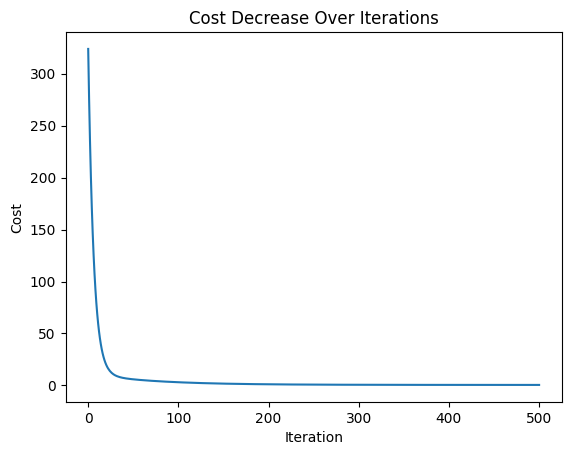

In [225]:
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Decrease Over Iterations')
plt.show()

In [229]:
predictions = predict(featuresMatrix , weights , bias)
df['Predictions'] = np.round(predictions , 2)
df.head()

,Company,TV,Radio,News,Units,Predictions
0,Microsoft,186.7,38.7,57.4,31.2,32.27
1,Microsoft,29.4,44.8,47.3,26.5,24.45
2,Uber,155.6,37.5,54.2,29.9,29.79
3,Microsoft,46.7,39.6,33.9,20.6,21.19
4,Tesla,36.3,42.6,34.8,21.5,21.73


In [227]:
predictions = predict(featuresMatrix , weights , bias)

target.shape , predictions.shape

((600, 1), (600, 1))

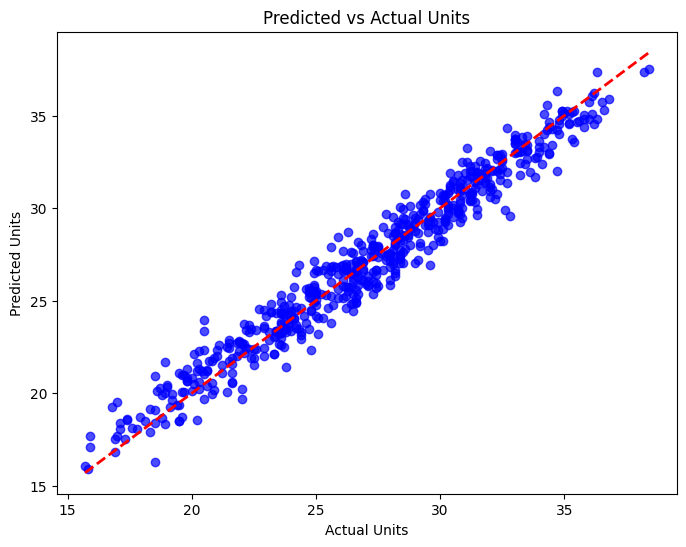

In [228]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Units'], df['Predictions'], color='blue', alpha=0.7)
plt.plot([df['Units'].min(), df['Units'].max()],
         [df['Units'].min(), df['Units'].max()],
         'r--', linewidth=2)  # perfect prediction line
plt.xlabel("Actual Units")
plt.ylabel("Predicted Units")
plt.title("Predicted vs Actual Units")
plt.show()
